In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

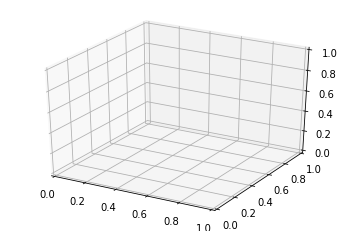

In [3]:
# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('property_tax_report.csv')

In [4]:
# Extract the columns and do some transformations
yearWiseAgg = data[['PID','CURRENT_LAND_VALUE']].groupby(data['YEAR_BUILT']).agg({'PID':'count','CURRENT_LAND_VALUE':'sum'})
yearWiseAgg = yearWiseAgg.reset_index().dropna()

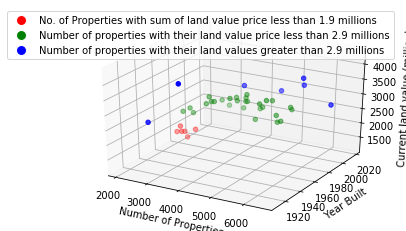

In [11]:
# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Define colors as red, green, blue
colors = ['r', 'g', 'b']

# Get only records which have more than 2000 properties built per year
morethan2k = yearWiseAgg.query('PID>2000')

# Get shape of dataframe
dflen = morethan2k.shape[0]

# Fetch land values from dataframe
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()

# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])
        
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)

# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')

In [13]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

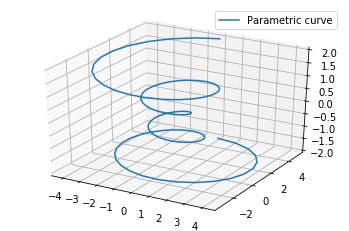

In [14]:
mpl.rcParams['legend.fontsize'] = 10

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Create data point to plot
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Plot line graph 
ax.plot(x, y, z, label='Parametric curve')

# Set default legend
ax.legend()

In [17]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

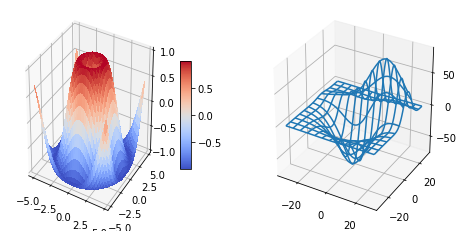

In [18]:
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# Get equally spaced numbers with interval of 0.25 from -5 to 5
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
# Convert it into meshgrid for plotting purpose using x and y
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
# Return a tuple X, Y, Z with a test data set
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

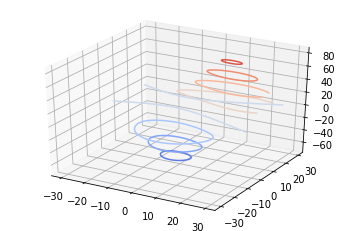

In [19]:
'''
==============
Contour Plots
==============
Plot a contour plot that shows intensity
'''

# Import libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)

# Set labels
ax.clabel(cset, fontsize=9, inline=1)

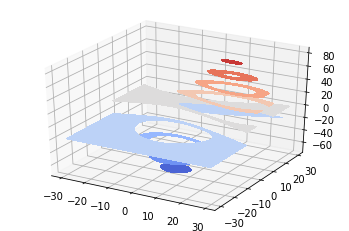

In [20]:
'''
==============
Contour Plots
==============
Plot a contour plot that shows intensity
'''
# Import libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

# Set labels
ax.clabel(cset, fontsize=9, inline=1)

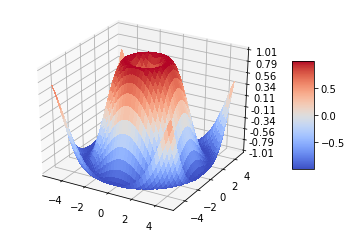

In [21]:
"""
========================
Create 3d surface plots
========================
Plot a contoured surface plot 
"""

# Import libraries
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Create figures object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

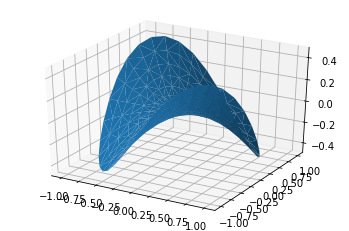

In [22]:
'''
======================
Triangular 3D surfaces
======================
Plot a 3D surface with a triangular mesh.
'''
# Import libraries
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

# Create figures object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Set parameters
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

# Plot triangular meshed surface plot
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

(0, 1)

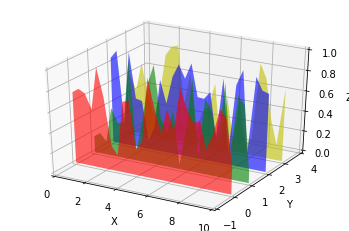

In [23]:
'''
==============
Polygon Plots
==============
Plot a polygon plot
'''
# Import libraries
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)


def polygon_under_graph(xlist, ylist):
    '''
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    '''
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []

# Set up the x sequence
xs = np.linspace(0., 10., 26)

# The ith polygon will appear on the plane y = zs[i]
zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'), cc('y')])
ax.add_collection3d(poly, zs=zs, zdir='y')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)